In [1]:
import huggingface_hub
print(huggingface_hub.__version__)

0.23.1


In [ ]:
from diffusers import StableDiffusionPipeline
import torch

# Load model
pipe = StableDiffusionPipeline.from_pretrained("runwayml/stable-diffusion-v1-5", torch_dtype=torch.float16)
pipe = pipe.to("cuda")  # If using GPU

# Generate image
prompt = "a futuristic city at sunset"
image = pipe(prompt).images[0]
image.save("output.png")


C:\Users\Hoi Yee\anaconda3\Lib\site-packages\huggingface_hub\file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


model_index.json:   0%|          | 0.00/541 [00:00<?, ?B/s]

C:\Users\Hoi Yee\anaconda3\Lib\site-packages\huggingface_hub\file_download.py:157: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\Hoi Yee\.cache\huggingface\hub\models--runwayml--stable-diffusion-v1-5. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to see activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


Fetching 15 files:   0%|          | 0/15 [00:00<?, ?it/s]

config.json: 0.00B [00:00, ?B/s]

preprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

scheduler_config.json:   0%|          | 0.00/308 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/617 [00:00<?, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

model.safetensors:   0%|          | 0.00/492M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/806 [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

config.json:   0%|          | 0.00/743 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/547 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/3.44G [00:00<?, ?B/s]

In [3]:
import json
with open('C:/Users/Hoi Yee/Downloads/Generative_AI_System/annotations_trainval2017/annotations/captions_train2017.json',"r") as f:
    data = json.load(f)

# Extract 100 prompts from the captions

prompts = [ann["caption"] for ann in data["annotations"][:100]]


In [4]:
print(prompts)

['A bicycle replica with a clock as the front wheel.', 'A room with blue walls and a white sink and door.', 'A car that seems to be parked illegally behind a legally parked car', 'A large passenger airplane flying through the air.', 'There is a GOL plane taking off in a partly cloudy sky.', 'Blue and white color scheme in a small bathroom.', 'This is a blue and white bathroom with a wall sink and a lifesaver on the wall.', 'A blue boat themed bathroom with a life preserver on the wall', 'The bike has a clock as a tire.', 'two cars parked on the sidewalk on the street', 'An airplane that is, either, landing or just taking off.', 'A bathroom with walls that are painted baby blue.', 'A bathroom with a toilet, sink, and shower.', 'A long empty, minimal modern skylit home kitchen.', 'A bathroom sink with toiletries on the counter.', 'A bathroom sink and various personal hygiene items.', 'This is an open box containing four cucumbers.', 'An old-fashioned green station wagon is parked on a sh

In [2]:
pipe = pipe.to("cpu")


Pipelines loaded with `dtype=torch.float16` cannot run with `cpu` device. It is not recommended to move them to `cpu` as running them will fail. Please make sure to use an accelerator to run the pipeline in inference, due to the lack of support for`float16` operations on this device in PyTorch. Please, remove the `torch_dtype=torch.float16` argument, or use another device for inference.
Pipelines loaded with `dtype=torch.float16` cannot run with `cpu` device. It is not recommended to move them to `cpu` as running them will fail. Please make sure to use an accelerator to run the pipeline in inference, due to the lack of support for`float16` operations on this device in PyTorch. Please, remove the `torch_dtype=torch.float16` argument, or use another device for inference.
Pipelines loaded with `dtype=torch.float16` cannot run with `cpu` device. It is not recommended to move them to `cpu` as running them will fail. Please make sure to use an accelerator to run the pipeline in inference, du

In [ ]:
from diffusers import StableDiffusionPipeline
import torch
import json
import os

# Load 5 captions from COCO dataset
with open('C:/Users/Hoi Yee/Downloads/Generative_AI_System/annotations_trainval2017/annotations/captions_train2017.json', "r") as f:
    data = json.load(f)

prompts = [ann["caption"] for ann in data["annotations"][:5]]

# Load the model
pipe = StableDiffusionPipeline.from_pretrained(
    "runwayml/stable-diffusion-v1-5",
    torch_dtype=torch.float32
)

# Move to CPU
pipe = pipe.to("cpu")

# Create output directory
output_dir = "generated_images_cpu"
os.makedirs(output_dir, exist_ok=True)

# Generate and save images
for i, prompt in enumerate(prompts):
    try:
        print(f"[{i+1}/5] Generating image for prompt: {prompt}")
        image = pipe(prompt).images[0]
        image.save(f"{output_dir}/image_{i+1:02d}.png")
    except Exception as e:
        print(f"Error generating image {i+1}: {e}")


C:\Users\Hoi Yee\anaconda3\Lib\site-packages\huggingface_hub\file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

[1/5] Generating image for prompt: A bicycle replica with a clock as the front wheel.


  0%|          | 0/50 [00:00<?, ?it/s]

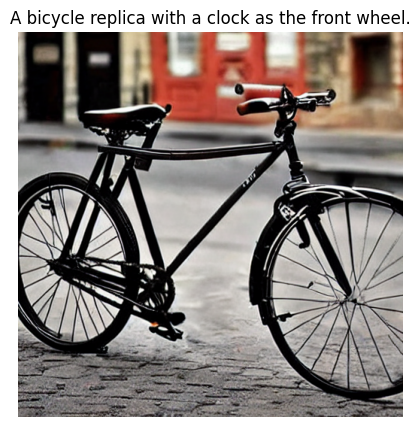

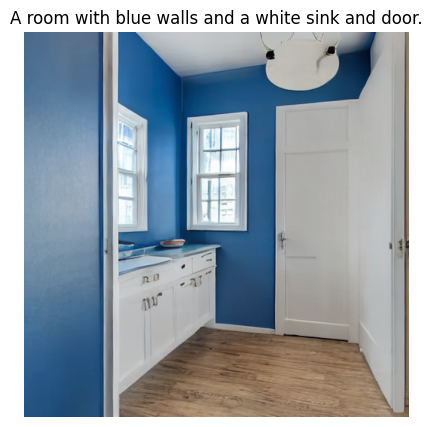

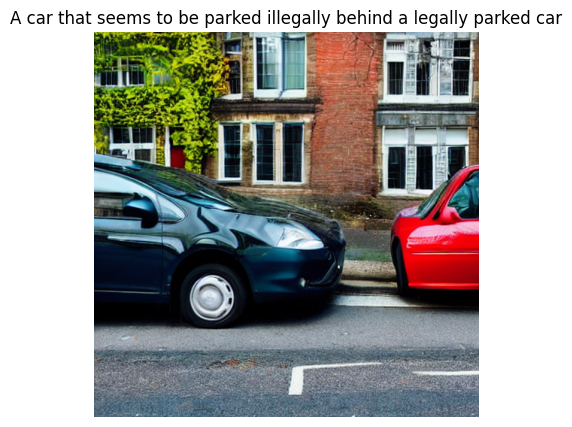

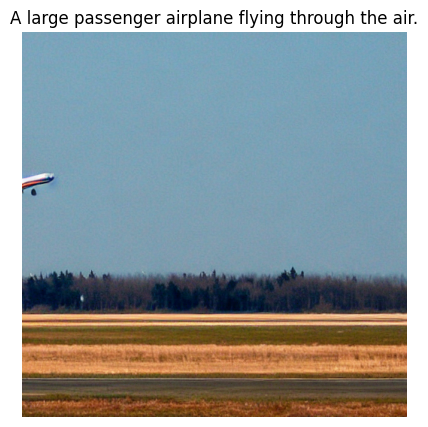

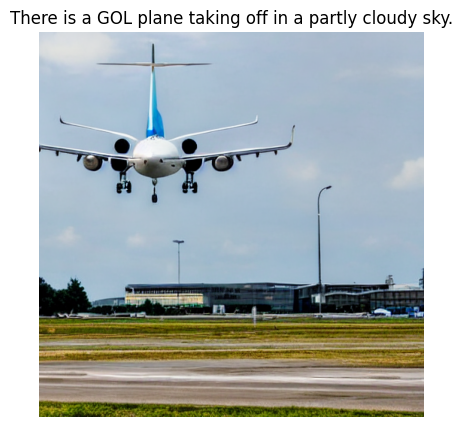

In [2]:
from PIL import Image
import matplotlib.pyplot as plt

for i, prompt in enumerate(prompts):
    image_path = f"{output_dir}/image_{i+1:02d}.png"
    img = Image.open(image_path)

    plt.figure(figsize=(5,5))
    plt.imshow(img)
    plt.title(prompt)
    plt.axis("off")
    plt.show()


In [4]:
# ✅ completed the Text-to-Image generation using Stable Diffusion (using MS COCO).


In [7]:
# using OpenEnded_mscoco_train2014_questions.json, Extract 5 Prompts

import json


# Load TDIUC/VQA-style question file
with open("C:/Users/Hoi Yee/Downloads/Generative_AI_System/TDIUC/Questions/OpenEnded_mscoco_train2014_questions.json", "r") as f:
    data = json.load(f)

# Extract the first 5 questions
video_prompts = [item["question"] for item in data["questions"][:5]]

# Print them out
for i, prompt in enumerate(video_prompts, 1):
    print(f"{i}. {prompt}")


1. What color handle does the middle man's racquet have?
2. Are there any couches in the photo?
3. What color is the bed sheets?
4. What color is in the bike?
5. Are there any snowboards in the photo?


In [9]:
!pip install modelscope
!pip install torch torchvision torchaudio


ERROR: Could not install packages due to an OSError: [Errno 28] No space left on device




  Obtaining dependency information for modelscope from https://files.pythonhosted.org/packages/7d/56/2fd308e7d8a38bd56d07bcde5f9e03bc2f4a2181c3eabefeafd2914781b8/modelscope-1.28.1-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/5.9 MB ? eta -:--:--
   ---------------------------------------- 0.1/5.9 MB 1.6 MB/s eta 0:00:04
    --------------------------------------- 0.1/5.9 MB 1.6 MB/s eta 0:00:04
   - -------------------------------------- 0.2/5.9 MB 1.8 MB/s eta 0:00:04
   -- ------------------------------------- 0.4/5.9 MB 2.7 MB/s eta 0:00:03
   ---- ----------------------------------- 0.7/5.9 MB 3.4 MB/s eta 0:00:02
   ------ --------------------------------- 1.0/5.9 MB 4.1 MB/s eta 0:00:02
   -------- ------------------------------- 1.2/5.9 MB 4.4 MB/s eta 0:00:02
   ---------- ----------------------------- 1.5/5.9 MB 4.5 MB/s eta 0:00:01
   ------------ --------------------------- 1.9/5.9 MB 5.1 MB/s eta 0:00:01
   -------------- ----------------------

ERROR: Exception:
Traceback (most recent call last):
  File "C:\Users\Hoi Yee\anaconda3\Lib\site-packages\pip\_vendor\urllib3\response.py", line 438, in _error_catcher
    yield
  File "C:\Users\Hoi Yee\anaconda3\Lib\site-packages\pip\_vendor\urllib3\response.py", line 561, in read
    data = self._fp_read(amt) if not fp_closed else b""
           ^^^^^^^^^^^^^^^^^^
  File "C:\Users\Hoi Yee\anaconda3\Lib\site-packages\pip\_vendor\urllib3\response.py", line 527, in _fp_read
    return self._fp.read(amt) if amt is not None else self._fp.read()
           ^^^^^^^^^^^^^^^^^^
  File "C:\Users\Hoi Yee\anaconda3\Lib\site-packages\pip\_vendor\cachecontrol\filewrapper.py", line 94, in read
    self.__buf.write(data)
  File "C:\Users\Hoi Yee\anaconda3\Lib\tempfile.py", line 483, in func_wrapper
    return func(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^
OSError: [Errno 28] No space left on device

During handling of the above exception, another exception occurred:

Traceback (most recent c

In [11]:
!pip install addict


  Obtaining dependency information for addict from https://files.pythonhosted.org/packages/6a/00/b08f23b7d7e1e14ce01419a467b583edbb93c6cdb8654e54a9cc579cd61f/addict-2.4.0-py3-none-any.whl.metadata


In [14]:
!pip install --upgrade pip setuptools
!pip install --upgrade urllib3 requests



  Obtaining dependency information for pip from https://files.pythonhosted.org/packages/b7/3f/945ef7ab14dc4f9d7f40288d2df998d1837ee0888ec3659c813487572faa/pip-25.2-py3-none-any.whl.metadata
  Obtaining dependency information for setuptools from https://files.pythonhosted.org/packages/a3/dc/17031897dae0efacfea57dfd3a82fdd2a2aeb58e0ff71b77b87e44edc772/setuptools-80.9.0-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/1.8 MB ? eta -:--:--
    --------------------------------------- 0.0/1.8 MB ? eta -:--:--
   -- ------------------------------------- 0.1/1.8 MB 1.3 MB/s eta 0:00:02
   --- ------------------------------------ 0.2/1.8 MB 1.3 MB/s eta 0:00:02
   ------- -------------------------------- 0.3/1.8 MB 1.9 MB/s eta 0:00:01
   ---------- ----------------------------- 0.5/1.8 MB 2.3 MB/s eta 0:00:01
   ---------------- ----------------------- 0.7/1.8 MB 2.8 MB/s eta 0:00:01
   ---------------------- ----------------- 1.0/1.8 MB 3.2 MB/s eta 0:00:01
   -------

ERROR: Exception:
Traceback (most recent call last):
  File "C:\Users\Hoi Yee\anaconda3\Lib\site-packages\pip\_vendor\urllib3\response.py", line 438, in _error_catcher
    yield
  File "C:\Users\Hoi Yee\anaconda3\Lib\site-packages\pip\_vendor\urllib3\response.py", line 561, in read
    data = self._fp_read(amt) if not fp_closed else b""
           ^^^^^^^^^^^^^^^^^^
  File "C:\Users\Hoi Yee\anaconda3\Lib\site-packages\pip\_vendor\urllib3\response.py", line 527, in _fp_read
    return self._fp.read(amt) if amt is not None else self._fp.read()
           ^^^^^^^^^^^^^^^^^^
  File "C:\Users\Hoi Yee\anaconda3\Lib\site-packages\pip\_vendor\cachecontrol\filewrapper.py", line 94, in read
    self.__buf.write(data)
  File "C:\Users\Hoi Yee\anaconda3\Lib\tempfile.py", line 483, in func_wrapper
    return func(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^
OSError: [Errno 28] No space left on device

During handling of the above exception, another exception occurred:

Traceback (most recent c

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
conda-repo-cli 1.0.75 requires requests_mock, which is not installed.
conda-repo-cli 1.0.75 requires clyent==1.2.1, but you have clyent 1.2.2 which is incompatible.
conda-repo-cli 1.0.75 requires PyYAML==6.0.1, but you have pyyaml 6.0 which is incompatible.
conda-repo-cli 1.0.75 requires requests==2.31.0, but you have requests 2.32.4 which is incompatible.



  Obtaining dependency information for requests from https://files.pythonhosted.org/packages/7c/e4/56027c4a6b4ae70ca9de302488c5ca95ad4a39e190093d6c1a8ace08341b/requests-2.32.4-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/64.8 kB ? eta -:--:--
   ------------------ --------------------- 30.7/64.8 kB 660.6 kB/s eta 0:00:01
   ---------------------------------------- 64.8/64.8 kB 866.8 kB/s eta 0:00:00
  Attempting uninstall: requests
    Found existing installation: requests 2.31.0
    Uninstalling requests-2.31.0:
      Successfully uninstalled requests-2.31.0


In [1]:
!pip install urllib3==1.26.16


  Obtaining dependency information for urllib3==1.26.16 from https://files.pythonhosted.org/packages/c5/05/c214b32d21c0b465506f95c4f28ccbcba15022e000b043b72b3df7728471/urllib3-1.26.16-py2.py3-none-any.whl.metadata
     ---------------------------------------- 0.0/48.4 kB ? eta -:--:--
     -------------------------------- ----- 41.0/48.4 kB 991.0 kB/s eta 0:00:01
     -------------------------------------- 48.4/48.4 kB 829.4 kB/s eta 0:00:00
   ---------------------------------------- 0.0/143.1 kB ? eta -:--:--
   ----------------- ---------------------- 61.4/143.1 kB 1.7 MB/s eta 0:00:01
   ---------------------------------- ----- 122.9/143.1 kB 2.4 MB/s eta 0:00:01
   ------------------------------------- -- 133.1/143.1 kB 1.6 MB/s eta 0:00:01
   ---------------------------------------- 143.1/143.1 kB 1.2 MB/s eta 0:00:00
  Attempting uninstall: urllib3
    Found existing installation: urllib3 2.5.0
    Uninstalling urllib3-2.5.0:
      Successfully uninstalled urllib3-2.5.0


In [2]:
!pip install datasets==2.10.1 huggingface_hub==0.14.1 --no-cache-dir



ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
accelerate 1.9.0 requires huggingface_hub>=0.21.0, but you have huggingface-hub 0.14.1 which is incompatible.
diffusers 0.27.2 requires huggingface-hub>=0.20.2, but you have huggingface-hub 0.14.1 which is incompatible.
tokenizers 0.19.1 requires huggingface-hub<1.0,>=0.16.4, but you have huggingface-hub 0.14.1 which is incompatible.
transformers 4.40.2 requires huggingface-hub<1.0,>=0.19.3, but you have huggingface-hub 0.14.1 which is incompatible.



  Obtaining dependency information for datasets==2.10.1 from https://files.pythonhosted.org/packages/fe/17/5825fdf034ff1a315becdbb9b6fe5a2bd9d8e724464535f18809593bf9c2/datasets-2.10.1-py3-none-any.whl.metadata
  Obtaining dependency information for huggingface_hub==0.14.1 from https://files.pythonhosted.org/packages/58/34/c57b951aecd0248845932c1cfc15721237c50e463f26b0536673bcb76f4f/huggingface_hub-0.14.1-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/469.0 kB ? eta -:--:--
   -- ------------------------------------- 30.7/469.0 kB 1.3 MB/s eta 0:00:01
   ------ --------------------------------- 81.9/469.0 kB 1.1 MB/s eta 0:00:01
   ------- -------------------------------- 92.2/469.0 kB 1.0 MB/s eta 0:00:01
   ----------- -------------------------- 143.4/469.0 kB 847.9 kB/s eta 0:00:01
   ------------------- -------------------- 225.3/469.0 kB 1.3 MB/s eta 0:00:01
   -------------------------- ------------- 307.2/469.0 kB 1.3 MB/s eta 0:00:01
   --------------

In [2]:
!pip install huggingface_hub==0.14.1 --no-cache-dir --user


In [ ]:
from modelscope.pipelines import pipeline
from modelscope.outputs import OutputKeys

pipe = pipeline('text-to-video-synthesis', model='damo-vilab/text-to-video-ms-1.7b')
prompt = "A group of people snowboarding down a snowy mountain slope."
result = pipe({'text': prompt})
print("Saved at:", result[OutputKeys.OUTPUT_VIDEO])


